# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

   State  Foreign Gift Amount
3     CA                 8770
31    NY                 2625
18    MA                 1756
35    PA                 1726
32    OH                 1530
39    TX                 1243
4     CO                 1217
19    MD                 1174
21    MI                  995
13    IL                  978


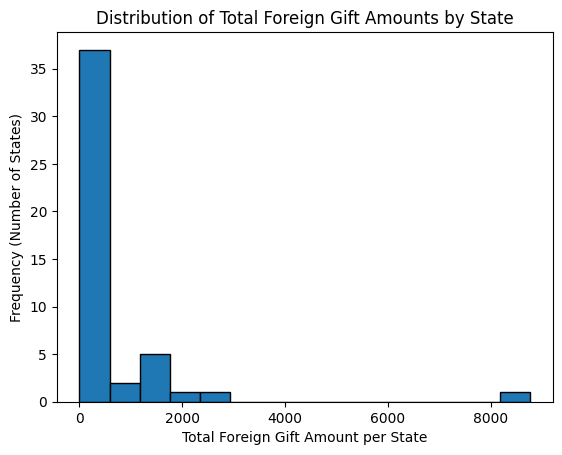

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('./data/ForeignGifts_edu.csv')
df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors = 'coerce')
state_counts = df.groupby('State')['Foreign Gift Amount'].count().reset_index()
state_counts = state_counts.sort_values(by='Foreign Gift Amount', ascending=False)
print(state_counts.head(10))

plt.hist(state_counts['Foreign Gift Amount'], bins=15, edgecolor='black')
plt.xlabel('Total Foreign Gift Amount per State')
plt.ylabel('Frequency (Number of States)')
plt.title('Distribution of Total Foreign Gift Amounts by State')
plt.show()




Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


(array([1.0936e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.7274e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

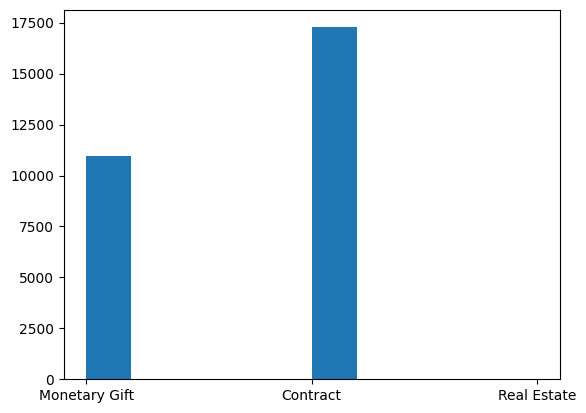

In [14]:
gift_type_proportions = df['Gift Type'].value_counts(normalize=True)  # Normalize=True gives proportions
print(gift_type_proportions)

plt.hist(df['Gift Type'])


Text(0.5, 1.0, 'KDE plot for foreign gift amount')

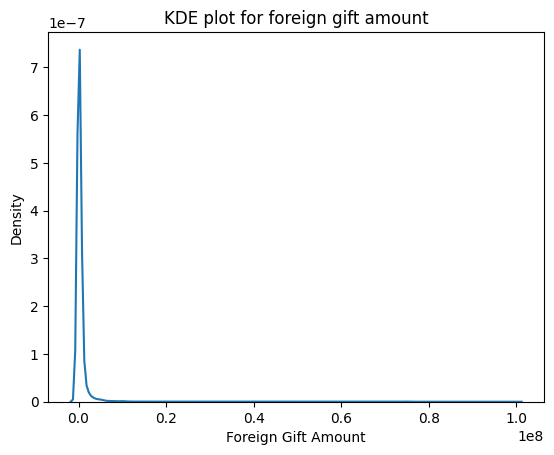

In [18]:
import seaborn as sns
sns.kdeplot(df['Foreign Gift Amount'])
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Density')
plt.title('KDE plot for foreign gift amount')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Foreign Gift Amount', ylabel='Density'>

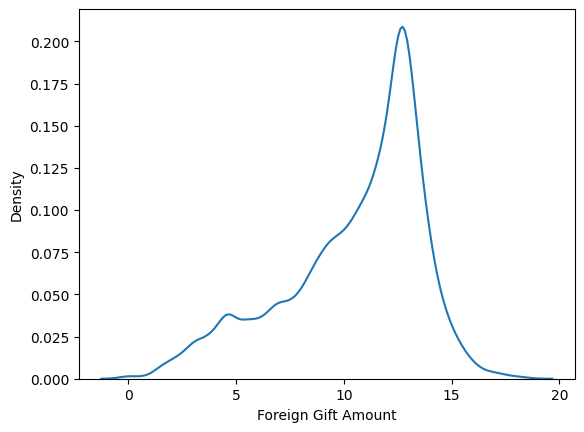

In [19]:
log_fga = np.log(df['Foreign Gift Amount'])
sns.kdeplot(log_fga)

When I used the log amounts for the foreign gift amount, the plot appeared to be a lot more normalized than the original plot. The first plot was heavily skewed to the left with one peak before the graph bottomed out. This log graph is still a bit skewed, though it is to the right this time, however, it is a lot easier to decipher and has easier to read numbers along the x-axis. 

In [24]:
df['Country of Giftor'].value_counts().head(15)


Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

In [26]:
top_countries = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_countries)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [31]:
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_institutions)

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


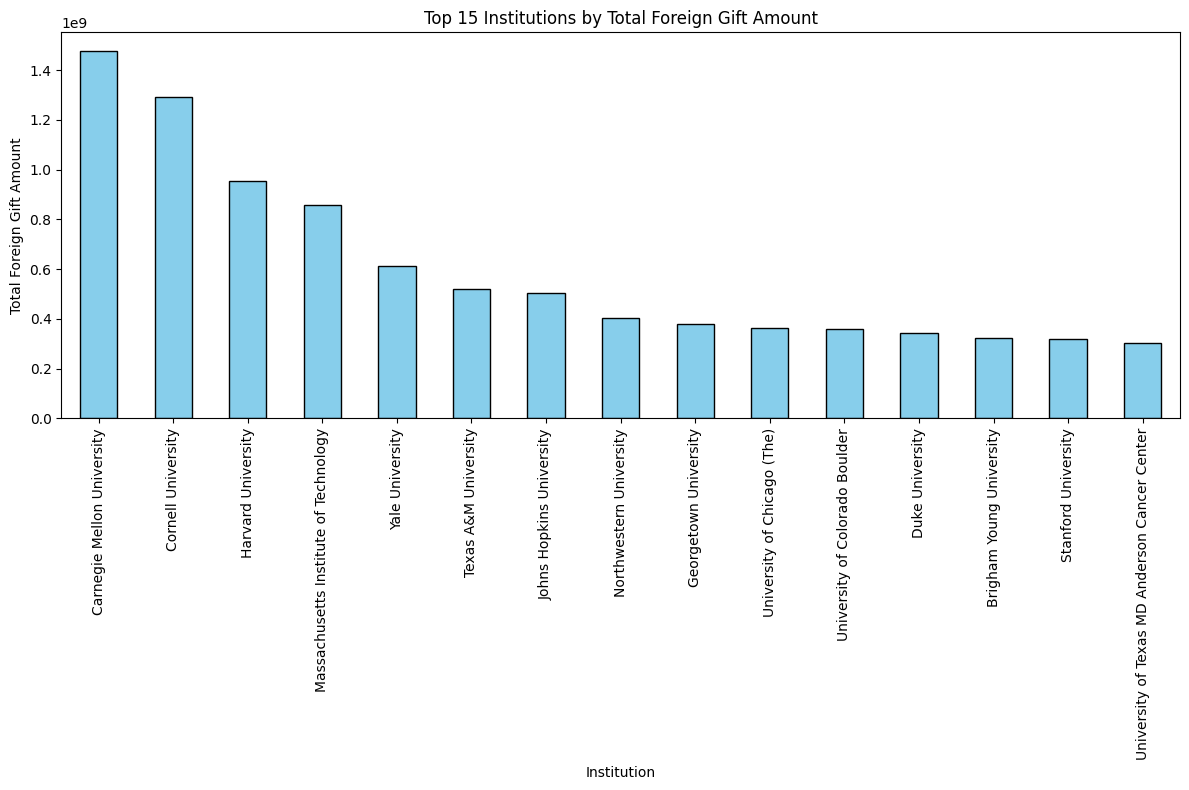

In [34]:
# Group by institution and sum the foreign gift amounts
total_amounts = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

# Sort the institutions by total gift amount (descending)
total_amounts = total_amounts.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
total_amounts.head(15).plot(kind='bar', color='skyblue', edgecolor='black')  # Show top 15
plt.title('Top 15 Institutions by Total Foreign Gift Amount')
plt.xlabel('Institution')
plt.ylabel('Total Foreign Gift Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [36]:
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(5)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [44]:
airbnb = pd.read_csv('./data/airbnb_hw.csv')
airbnb.shape

(30478, 13)

In [46]:
airbnb.describe

<bound method NDFrame.describe of         Host Id Host Since                                Name Neighbourhood   \
0       5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1      33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2      39608626        NaN                Sunny Room in Harlem      Manhattan   
3           500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4           500  6/26/2008            Trendy Times Square Loft      Manhattan   
...         ...        ...                                 ...            ...   
30473  43022976  8/31/2015   10 Mins to Time Square/two floors         Queens   
30474  42993382  8/31/2015       1BR ocean view & F,Q train st       Brooklyn   
30475  43033067  8/31/2015                Amazing Private Room       Brooklyn   
30476  43000991  8/31/2015   Charming private female room: UWS      Manhattan   
30477  42999189  8/31/2015    Huge Beautiful Bedroom - Astoria         Quee

In [47]:
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [49]:
crosstab = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
print(crosstab)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

Patterns in the cross-table:
1. private rooms are more popular than the entire home for Castles, huts, dorms, tents, treehouses, bed and breakfasts, and houses
2. private rooms are much more popular than shared ones in apartments and houses. 
3. Castles, chalets, lighthouses, and treehouses seem to be the least popular among this data set. 

(array([19710.,  5707.,  1975.,  1276.,   744.,   403.,   317.,   167.,
          117.,    62.]),
 array([  0.,  51., 102., 153., 204., 255., 306., 357., 408., 459., 510.]),
 <BarContainer object of 10 artists>)

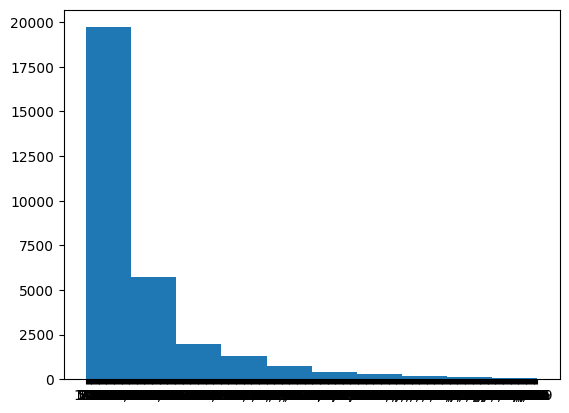

In [50]:
plt.hist(airbnb['Price'])

<Axes: xlabel='Price', ylabel='Density'>

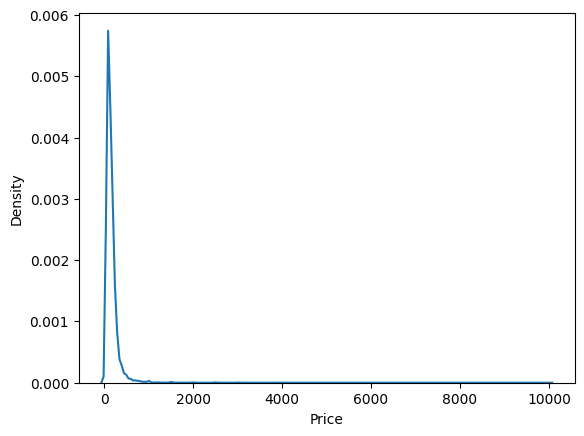

In [53]:

airbnb['Price'] = airbnb['Price'].str.replace(',', '').str.replace('$', '').astype(float)
sns.kdeplot(airbnb['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2805de850>,
 'caps': [<matplotlib.lines.Line2D at 0x2805dead0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2805de710>],
 'medians': [<matplotlib.lines.Line2D at 0x2805ded50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2805dee90>],
 'means': []}

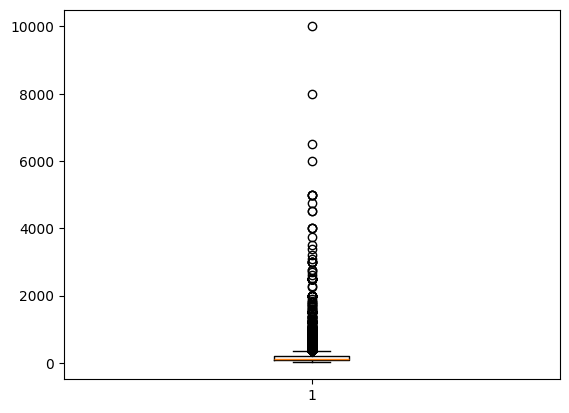

In [54]:
plt.boxplot(airbnb['Price'])

(array([3.0000e+00, 3.6200e+02, 6.4650e+03, 1.2666e+04, 8.9280e+03,
        1.6110e+03, 3.3500e+02, 7.9000e+01, 2.5000e+01, 4.0000e+00]),
 array([2.30258509, 2.99336062, 3.68413615, 4.37491168, 5.0656872 ,
        5.75646273, 6.44723826, 7.13801379, 7.82878932, 8.51956484,
        9.21034037]),
 <BarContainer object of 10 artists>)

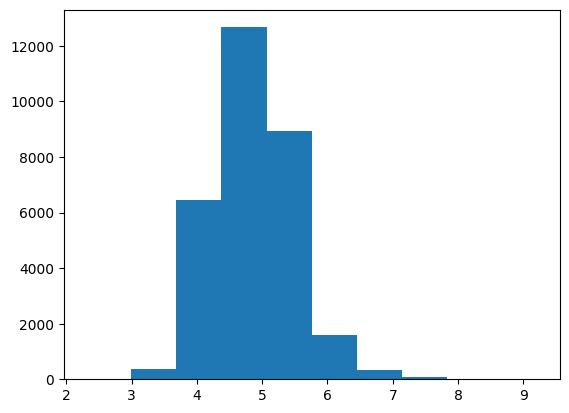

In [56]:
price_log = np.log(airbnb['Price'])
plt.hist(price_log)

<Axes: xlabel='Price', ylabel='Density'>

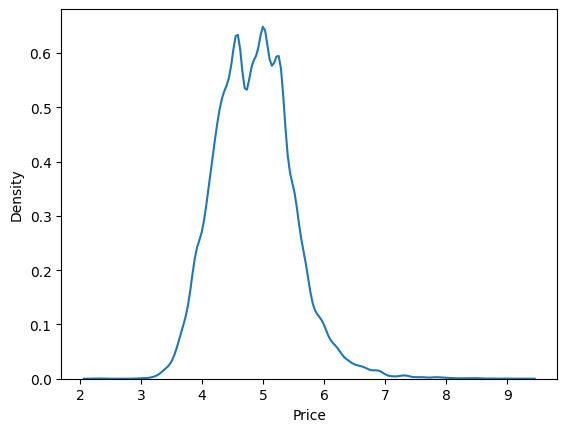

In [57]:
sns.kdeplot(price_log)

{'whiskers': [<matplotlib.lines.Line2D at 0x2806c8a50>,
 'caps': [<matplotlib.lines.Line2D at 0x2806c8cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2806c8910>],
 'medians': [<matplotlib.lines.Line2D at 0x2806c8f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2806c9090>],
 'means': []}

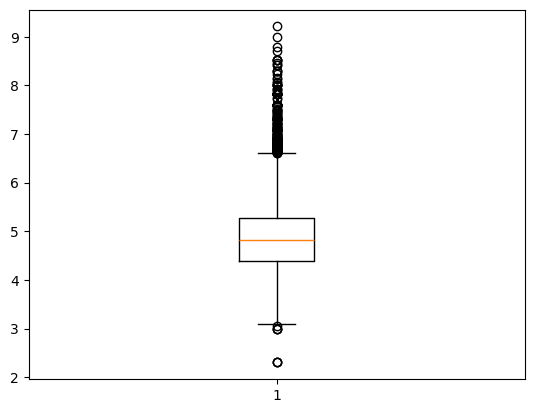

In [58]:
plt.boxplot(price_log)

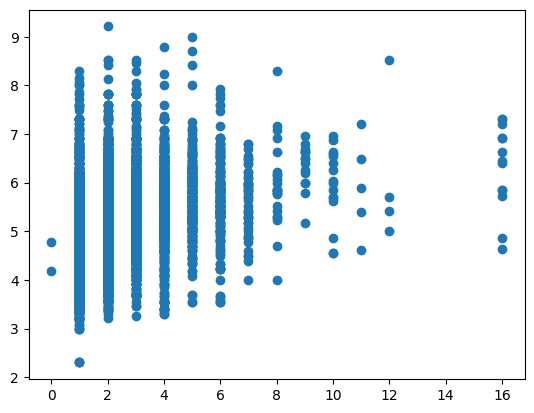

In [62]:
plt.scatter(airbnb['Beds'], price_log)

There doesn't seem to be much of a random scatter, there are just vertical lines of dots. 

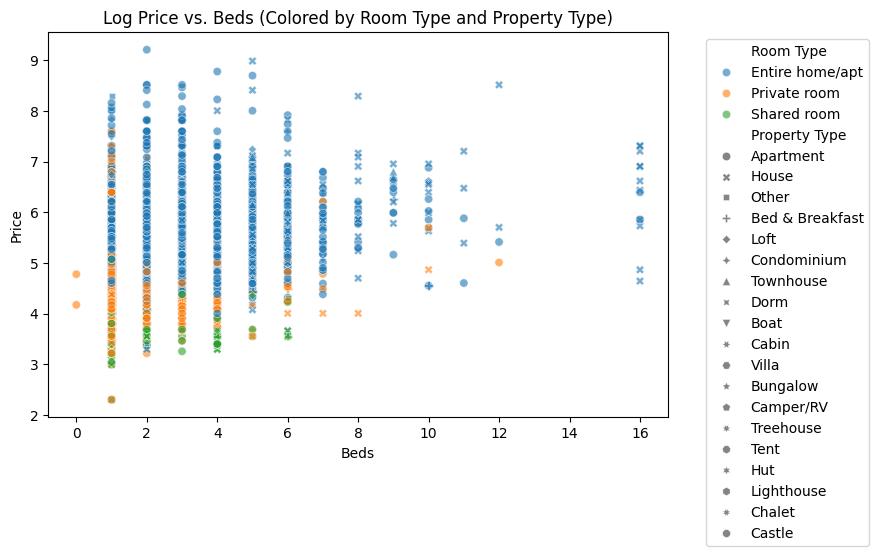

mean          std  median
Room Type       Property Type                                   
Entire home/apt Apartment        213.224839   218.097834   175.0
                Bed & Breakfast  184.538462   119.814172   130.0
                Boat             158.428571    51.110524   150.0
                Bungalow         150.750000    46.464144   160.5
                Cabin            250.000000          NaN   250.0
                Camper/RV        114.333333   107.685963    74.0
                Condominium      304.861111   266.197497   200.0
                Dorm              44.250000    24.060687    33.5
                House            297.263298   468.409428   195.0
                Lighthouse        39.000000          NaN    39.0
                Loft             330.510204   321.519721   225.0
                Other            843.428571  1133.062271   300.0
                Townhouse        280.783133   314.605252   190.0
                Villa            529.750000   650.963581   249.5
Private room    Apartment         92.713900    65.237050    82.0
                Bed & Breakfast   97.161290    47.031971    85.0
                Boat             120.000000          NaN   120.0
                Cabin             80.000000          NaN    80.0
                Camper/RV         39.000000          NaN    39.0
                Castle           150.000000          NaN   150.0
                Chalet            99.000000          NaN    99.0
                Condominium       98.590909    40.576394    90.0
                Dorm              86.562500    40.738137    70.0
                House             77.750397    49.402650    69.0
                Hut               75.000000    35.355339    75.0
                Loft             108.057692   128.817912    85.0
                Other            211.931034   235.404505   119.0
                Tent             126.250000    94.989034   107.5
                Townhouse         83.365385    30.578109    80.0
                Treehouse         95.000000          NaN    95.0
                Villa            126.250000    71.107313   125.0
Shared room     Apartment         79.200000    67.720849    66.0
                Bed & Breakfast  143.666667   245.328104    65.0
                Dorm              73.181818    46.328864    55.0
                House             77.487500   275.409936    45.0
                Loft              78.816327    87.521824    50.0
                Other            148.750000   134.806961    87.5
                Townhouse         95.000000          NaN    95.0
                Treehouse        167.666667   114.788211   108.0

In [69]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=airbnb, x='Beds',y=price_log, hue='Room Type', style='Property Type', alpha=0.6)
plt.title("Log Price vs. Beds (Colored by Room Type and Property Type)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Group by Room Type and Property Type to analyze price trends
airbnb.groupby(['Room Type', 'Property Type'])['Price'].agg(['mean', 'std', 'median'])


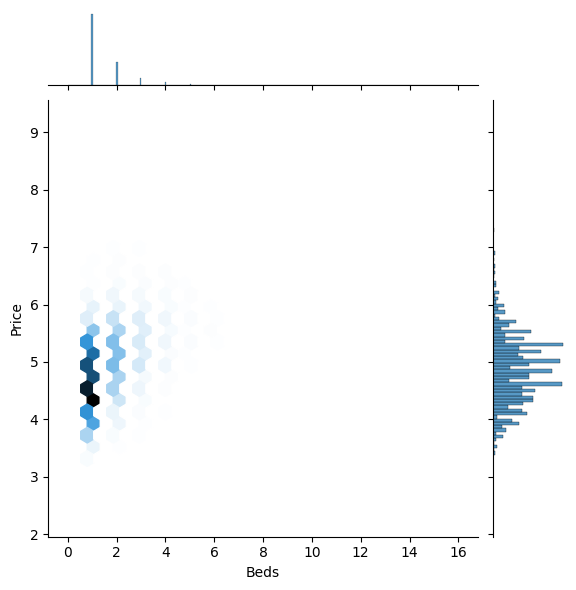

In [70]:
sns.jointplot(data=airbnb, x="Beds", y=price_log, kind="hex", gridsize=30)
plt.show()


**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.